In [126]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from mlxtend.plotting import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, accuracy_score

In [127]:
# Read the CSV file into a DataFrame
data = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [128]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [129]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [130]:
data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [131]:
data['DEATH_EVENT'].value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

In [132]:
# Splitting data
X = data.drop('DEATH_EVENT' , axis = 1)
y = data.DEATH_EVENT

In [133]:
sm = SMOTE()
X,y = sm.fit_resample(X,y)
X

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.000000,0,582,0,20,1,265000.000000,1.900000,130,1,0,4
1,55.000000,0,7861,0,38,0,263358.030000,1.100000,136,1,0,6
2,65.000000,0,146,0,20,0,162000.000000,1.300000,129,1,1,7
3,50.000000,1,111,0,20,0,210000.000000,1.900000,137,1,0,7
4,65.000000,1,160,1,20,0,327000.000000,2.700000,116,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...
401,75.609782,0,719,0,49,0,308504.058018,1.168699,133,1,0,128
402,52.886760,0,152,0,19,0,271794.626201,1.808637,128,0,0,90
403,68.273443,0,435,0,35,0,263358.030000,1.716047,135,0,0,23
404,50.000000,0,355,1,35,0,316132.215261,1.286778,130,0,0,30


In [134]:
# Creating function for scaling
def Standard_Scaler (data, col_names):
    features = data[col_names]
    scaler = StandardScaler().fit(features.values)
    features = scaler.transform(features.values)
    data[col_names] = features
    
    return data

In [135]:
X = Standard_Scaler(X , X.columns)

In [136]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.25 , random_state = 42 , shuffle = True)

In [137]:
rfc = RandomForestClassifier(n_estimators=50, random_state=13)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

In [138]:
def evaluate_normal_model(pred , test):
    recall = recall_score(test, pred)
    precision = precision_score(test, pred)
    f1 = f1_score(test, pred)
    accuracy = accuracy_score(test, pred)
    cm = confusion_matrix(test, pred)
    
    return recall, precision, f1, accuracy, cm

def evaluate_cv_model(model, X_train, y_train, kFolds):
    r_score = cross_val_score(model, X_train, y_train, cv=kFolds, scoring='recall')
    recall = r_score.mean()
    p_score = cross_val_score(model, X_train, y_train, cv=kFolds, scoring='precision')
    precision = p_score.mean()
    f1_score = cross_val_score(model, X_train, y_train, cv=kFolds, scoring='f1')
    f1 = f1_score.mean()
    a_score = cross_val_score(model, X_train, y_train, cv=kFolds, scoring='accuracy')
    accuracy = a_score.mean()

    return recall, precision, f1, accuracy

In [139]:
kf = KFold(n_splits=5, random_state=42 , shuffle = True)

In [140]:
n_recall, n_precision, n_f1, n_accuracy, n_cm = evaluate_normal_model(y_pred , y_test)

In [141]:
cv_recall, cv_precision, cv_f1, cv_accuracy = evaluate_cv_model(rfc, X_train, y_train, kf)

In [142]:
dataFrame = [(n_recall, cv_recall, n_precision, cv_precision, n_f1, cv_f1, n_accuracy, cv_accuracy)]
rfc_score = pd.DataFrame(data = dataFrame, columns=
                        ['N-Recall', 'CV-Recall', 'N-Precision', 'CV-Precision', 
                         'N-F1 Score', 'CV-F1 Score','N-Accuracy','CV-Accuracy'])
rfc_score.insert(0, 'Random Forest', 'Before Grid Search')
rfc_score

,Random Forest,N-Recall,CV-Recall,N-Precision,CV-Precision,N-F1 Score,CV-F1 Score,N-Accuracy,CV-Accuracy
0,Before tuning hyperparameters,0.843137,0.888128,0.86,0.892112,0.851485,0.887806,0.852941,0.888033


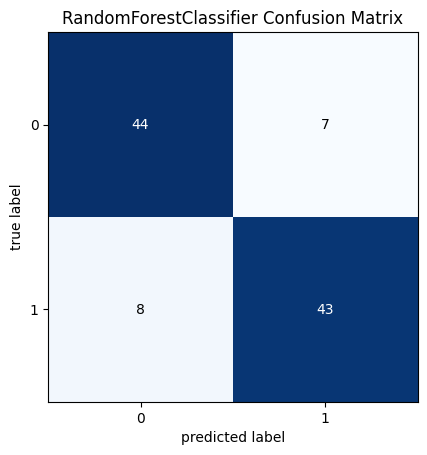

In [144]:
plot_confusion_matrix(n_cm)
plt.title("RandomForestClassifier Confusion Matrix")
plt.show()

In [148]:
params = {
    "max_depth": [5,9,10,12,15,20],
    "min_samples_leaf": [1,2,3],
    'n_estimators': [25,50,100,130,170,190,200],
    'random_state': [13,42],
    'min_samples_split': [3,4,5,6]
}

In [149]:
grid_rfc = GridSearchCV(rfc , param_grid=params, cv=kf, scoring='accuracy').fit(X_train, y_train)

In [150]:
y_pred_grid = grid_rfc.predict(X_test)

In [151]:
grid_n_recall, grid_n_precision, grid_n_f1, grid_n_accuracy, grid_n_cm = evaluate_normal_model(y_pred_grid , y_test)

In [152]:
grid_cv_recall, grid_cv_precision, grid_cv_f1, grid_cv_accuracy = evaluate_cv_model(rfc, X_train, y_train, kf)

In [154]:
dataFrame = [(grid_n_recall, grid_cv_recall, grid_n_precision, grid_cv_precision, grid_n_f1, grid_cv_f1, grid_n_accuracy, grid_cv_accuracy)]
rfc_score = pd.DataFrame(data = dataFrame, columns=
                        ['N-Recall', 'CV-Recall', 'N-Precision', 'CV-Precision', 
                         'N-F1 Score', 'CV-F1 Score','N-Accuracy','CV-Accuracy'])
rfc_score.insert(0, 'Random Forest', 'After Grid Search')
rfc_score

,Random Forest,N-Recall,CV-Recall,N-Precision,CV-Precision,N-F1 Score,CV-F1 Score,N-Accuracy,CV-Accuracy
0,After Grid Search,0.882353,0.888128,0.865385,0.892112,0.873786,0.887806,0.872549,0.888033


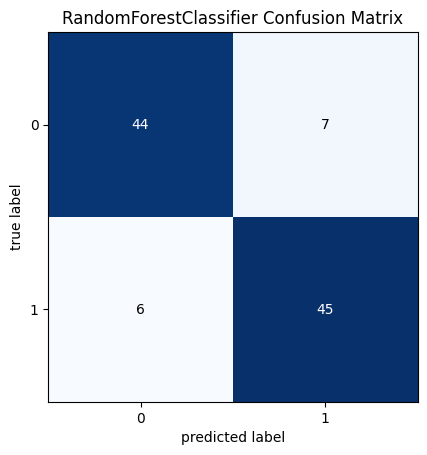

In [156]:
plot_confusion_matrix(grid_n_cm)
plt.title("RandomForestClassifier Confusion Matrix")
plt.show()

In [155]:
imp_features = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": grid_rfc.best_estimator_.feature_importances_
})

imp_features.sort_values(by="Imp", ascending=False)

,Varname,Imp
11,time,0.390704
7,serum_creatinine,0.165938
4,ejection_fraction,0.140668
6,platelets,0.065490
8,serum_sodium,0.060714
2,creatinine_phosphokinase,0.059459
0,age,0.057811
3,diabetes,0.014934
9,sex,0.014106
10,smoking,0.010506


In [157]:
print('Best parameters:', grid_rfc.best_params_)
print('Best score:', grid_rfc.best_score_)

Best parameters: {'max_depth': 9, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 25, 'random_state': 13}
Best score: 0.9012568306010929
